**Prophet** is a forecasting procedure that was published by Facebook for quick and efficient forecasting! To learn more about the package: https://facebook.github.io/prophet/

## I. Install Prophet

**1. Install Pystan** <br> Pystan is a package that is required to install and run Prophet. For more information about Pystan installation, see this link: https://pystan.readthedocs.io/en/latest/installation_beginner.html

In [5]:
conda install pystan #install using anaconda command
#pip install pystan #install using your laptop's command prompt / terminal

**2. Install Plotly** <br> Plotly is a graphing dependancy that is referenced by the Prophet package. You will not need plotly to execute forecasting with Prophet, but installing the package will prevent error messages from occuring when the prophet package is installed.

In [11]:
conda install -c plotly plotly=4.5.2 #install using anaconda command
# pip install plotly==4.5.2 #install using your laptop's command prompt / terminal

**3. Install the Prophet Package**

In [6]:
conda install fbprophet #install using anaconda command
#pip install fbprophet #install using your laptop's command prompt / terminal

## II. Import Packages

In [28]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import math
import holidays

## III. Review Prophet Functionality

**Prophet Inputs:** a dataframe with two columns: ds and y. <br>
**Input Format:** 
- The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. 
- The y column must be numeric, and represents the measurement we wish to forecast.

**Load Time Series** <br>
We will start exploring with prophet using the prophet example time series: Peyton Manning wikipedia page views. <br>
Source: https://github.com/facebook/prophet/blob/master/examples/example_wp_log_peyton_manning.csv

In [368]:
wiki_df = pd.read_csv('Peyton_Manning.csv')

The dataframe has two features:
1. **ds:** the date of the recorded viewcount
2. **y:** the log of the views for that day

In [369]:
wiki_df.head()

,ds,y
0,12/10/07,9.590761
1,12/11/07,8.519590
2,12/12/07,8.183677
3,12/13/07,8.072467
4,12/14/07,7.893572


**Clean Time Series Data Format**
Note that the loaded time series is not in the correct date format required by Prophet. We need to modify the time series format because the **ds** feature is currently an   **object** type

In [370]:
wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
ds    2905 non-null object
y     2905 non-null float64
dtypes: float64(1), object(1)
memory usage: 45.5+ KB


In [371]:
wiki_df.ds = pd.to_datetime(wiki_df.ds)

**Review the updated data**

In [372]:
wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
ds    2905 non-null datetime64[ns]
y     2905 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.5 KB


In [373]:
wiki_df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


## Visualize the Data
**Plot the Time Series with Matplotlib**

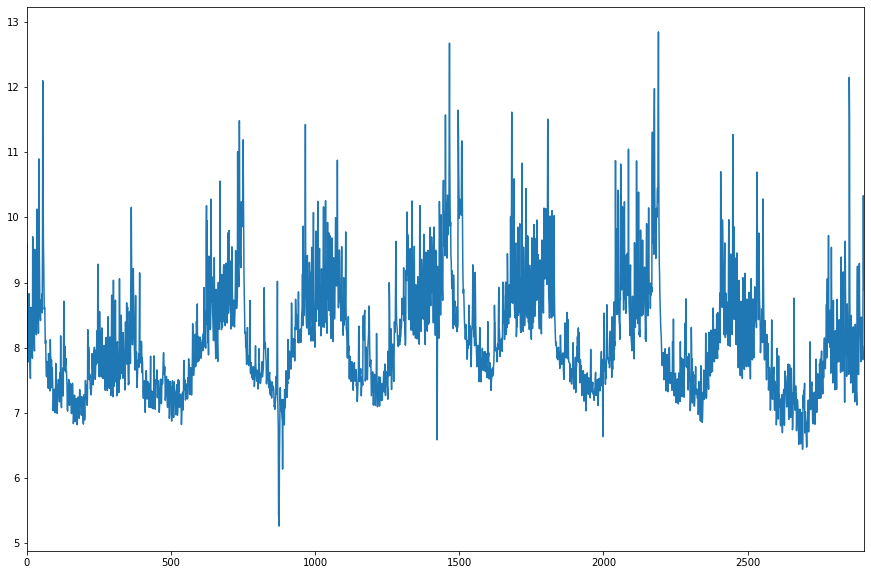

In [374]:
plt.figure(figsize=(15,10))
wiki_df.y.plot()

## Transform the Data

**Ensure the Data is Centered Around 0 (Stationary)**<br> We start by taking the natural log of the data. 

In [376]:
wiki_df.head(3)

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677


In [377]:
stationary = wiki_df
stationary.y = np.log10(stationary.y)

In [379]:
stationary.head(3)

,ds,y
0,2007-12-10,0.981853
1,2007-12-11,0.930419
2,2007-12-12,0.912948


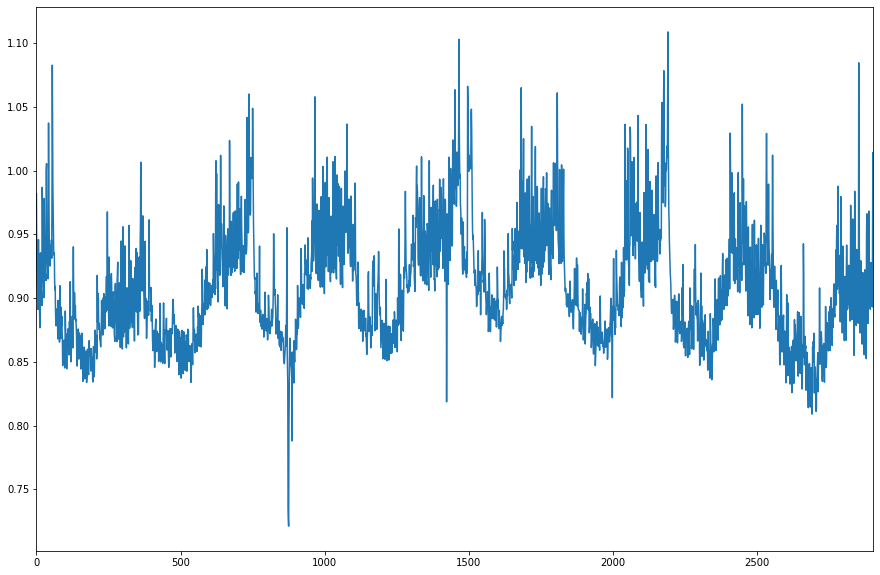

In [380]:
plt.figure(figsize=(15,10))
stationary.y.plot()

**Removing Trends by Taking the Difference of Data**

In [382]:
diff = stationary.y.diff(periods = 1)
stationary.y = diff
stationary.head(3)

,ds,y
0,2007-12-10,NaN
1,2007-12-11,NaN
2,2007-12-12,0.033964


In [383]:
stationary = stationary.drop(test.index[0])

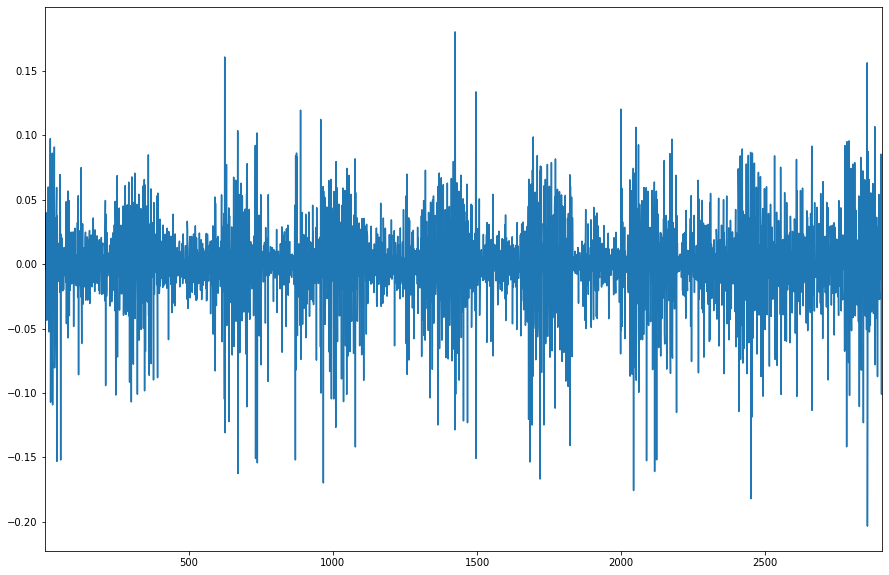

In [384]:
plt.figure(figsize=(15,10))
stationary.y.plot()

**Review one year of the transformed time series.**

In [386]:
stationary[0:360]

,ds,y
1,2007-12-11,NaN
2,2007-12-12,0.033964
3,2007-12-13,0.011528
4,2007-12-14,-0.003791
5,2007-12-15,0.003642
6,2007-12-16,0.039913
7,2007-12-17,-0.012905
8,2007-12-18,-0.043466
9,2007-12-19,0.006029
10,2007-12-20,0.006152


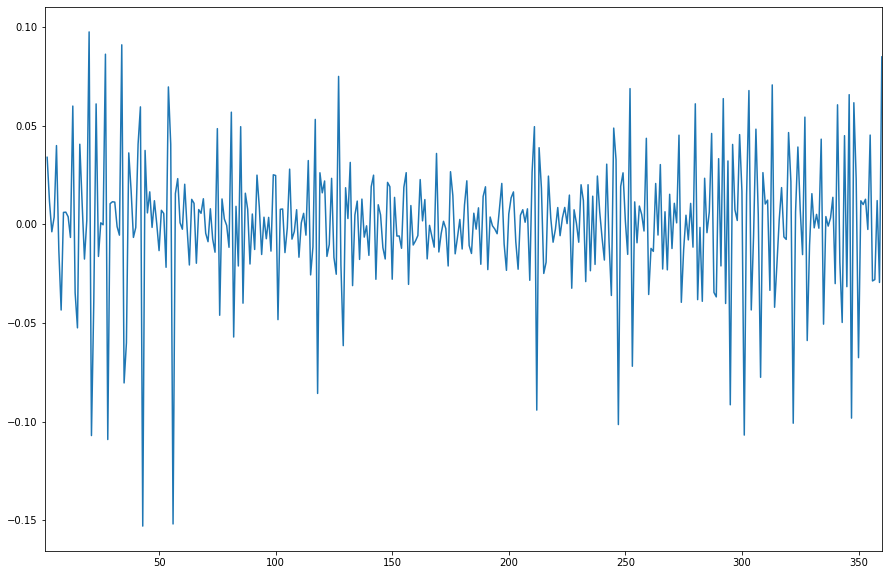

In [385]:
plt.figure(figsize=(15,10))
stationary[0:360].y.plot()

## Forecasting & Prediction w/ Default Prophet Functionality
Creating a forecast without modifying the time series or adjusting any hyperparameters. We will start by re-loading the data to remove any previous transformations.

**Defining historical (training) and future (test) data**

In [3]:
wiki_df = pd.read_csv('Peyton_Manning.csv')
wiki_df.ds = pd.to_datetime(wiki_df.ds)

**Create a Prediction Dataframe**<br>
The prediction dataframe will store the historical (training) data to be used when creating the model. We will remove the the last **prediction_size** observations from the dataset for model testing and evaluation.

In [4]:
prediction_size = 360
train_df = wiki_df[:-prediction_size]
train_df.tail(n=3)

,ds,y
2542,2015-01-21,8.661120
2543,2015-01-22,8.584852
2544,2015-01-23,8.396606


**Create a Test Dataframe**<br> containing the 360 observations that will be used for future observations & testing.

In [5]:
test_df = wiki_df[len(wiki_df)-prediction_size:]

In [6]:
test_df.tail(n=3)

,ds,y
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


**Creating a Prophet Model** <br> Initiate a prophet model by creating an object to store the Prophet function.<br>
We will use the two dataframes just created to make our model:<br>**train_df**: 2544 historical observations<br>**test_df**: 360 historical observations

In [7]:
m = Prophet()

Fit the prophet model to the dataset

In [8]:
m.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Create an empty future dataframe to store predictions**<br>Create a dataframe to store the historical data and the model predictions

In [9]:
future = m.make_future_dataframe(periods=360)
future.tail()

,ds
2900,2016-01-14
2901,2016-01-15
2902,2016-01-16
2903,2016-01-17
2904,2016-01-18


**Predict the 360 days into the future**

In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2900,2016-01-14,8.697372,8.017596,9.480078
2901,2016-01-15,8.729344,7.981676,9.448324
2902,2016-01-16,8.539784,7.810885,9.293287
2903,2016-01-17,8.933493,8.216943,9.697321
2904,2016-01-18,9.238823,8.492780,9.986392


**Plotting the Forecast** <br>
We have now predicted a year of Peyton Manning's wikipedia page views based on the historical pageviews using Prophet! <br> We will plot the results to see the overall forecast.

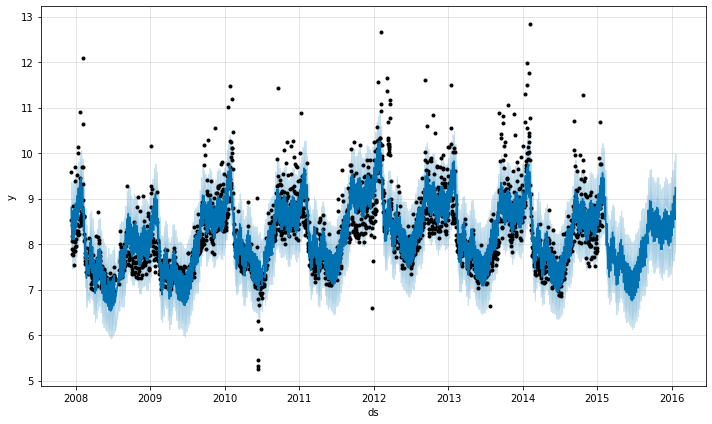

In [11]:
fig1 = m.plot(forecast)

**Review the Components of the Model**

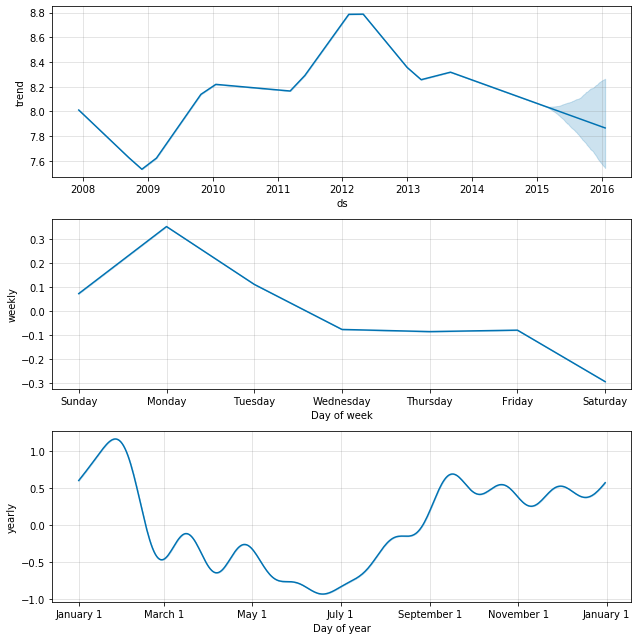

In [12]:
fig2 = m.plot_components(forecast)

## Identifying Changepoints in the Model

<Figure size 1080x720 with 0 Axes>

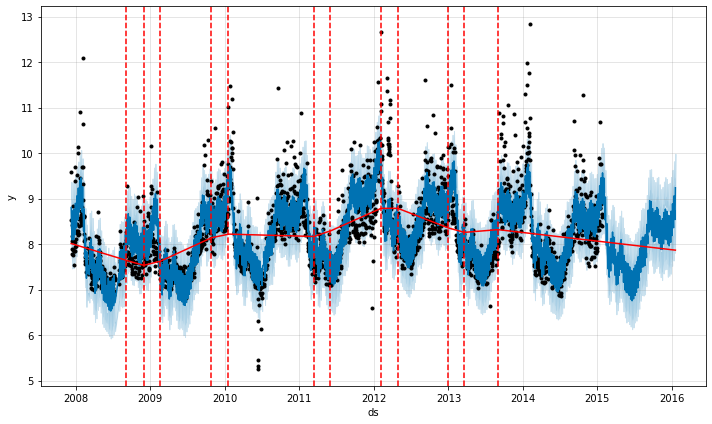

In [13]:
from fbprophet.plot import add_changepoints_to_plot
plt.figure(figsize=(15,10))
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## Forecast Quality
Calculate the error for the 360 days predicted.

In [14]:
print(', '.join(forecast.columns))

ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, weekly, weekly_lower, weekly_upper, yearly, yearly_lower, yearly_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, yhat


**Save the results in one dataframe**

In [15]:
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.011508,8.155568,9.369155,8.011508,8.011508,0.791861,0.791861,0.791861,0.353355,0.353355,0.353355,0.438506,0.438506,0.438506,0.0,0.0,0.0,8.803370
1,2007-12-11,8.010136,7.952368,9.167424,8.010136,8.010136,0.536879,0.536879,0.536879,0.111644,0.111644,0.111644,0.425235,0.425235,0.425235,0.0,0.0,0.0,8.547015
2,2007-12-12,8.008764,7.729496,8.976242,8.008764,8.008764,0.335832,0.335832,0.335832,-0.076947,-0.076947,-0.076947,0.412779,0.412779,0.412779,0.0,0.0,0.0,8.344596


In [16]:
results = forecast.set_index('ds')[['yhat']]

In [17]:
results = results.join(wiki_df.set_index('ds'))

In [18]:
results.head(3)

,yhat,y
ds,,
2007-12-10,8.803370,9.590761
2007-12-11,8.547015,8.519590
2007-12-12,8.344596,8.183677


In [19]:
results = results.dropna()

In [20]:
MAE_1 = mean_absolute_error(results.y, results.yhat)
print('Mean Absolute Error:', MAE_1)

Mean Absolute Error: 0.35052423769332974


In [21]:
MSE_1 = mean_squared_error(results.y, results.yhat)
print('Mean Squared Error:', MSE_1)

Mean Squared Error: 0.24338829460793038


## Transform the Model w/ Hyperparameters

**Identifying and Fitting a Model w/ Changepoints**

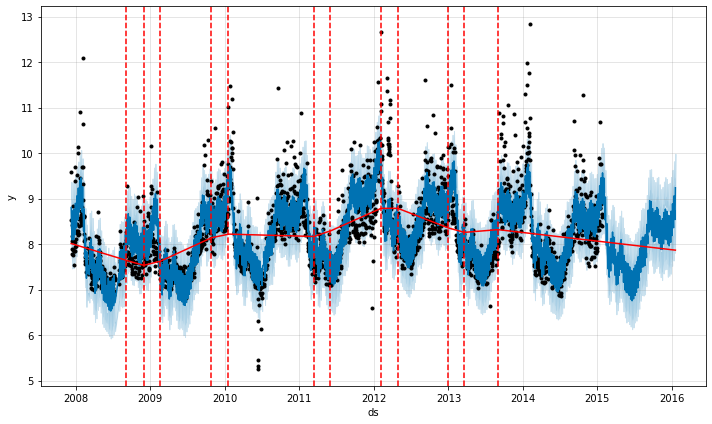

In [22]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


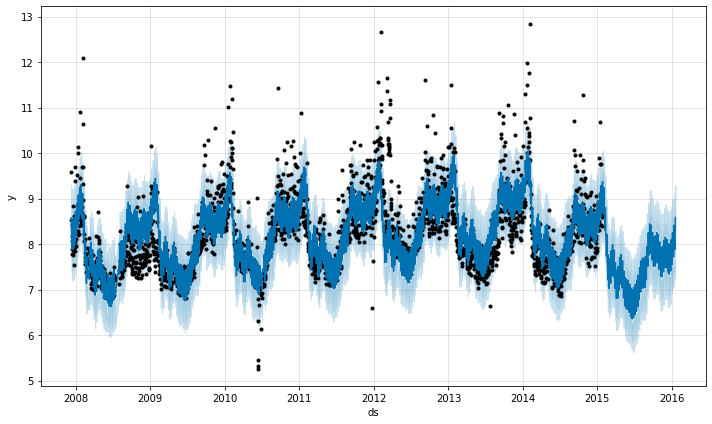

In [23]:
#Specify the location of changepoints
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(train_df).predict(future)
fig = m.plot(forecast)

In [25]:
results_cp = forecast.set_index('ds')[['yhat']]
results_cp = results_cp.join(wiki_df.set_index('ds'))
results_cp = results_cp.dropna()
results_cp.head(3)

,yhat,y
ds,,
2007-12-10,8.575556,9.590761
2007-12-11,8.324579,8.519590
2007-12-12,8.124168,8.183677


In [26]:
MAE_CP = mean_absolute_error(results_cp.y, results_cp.yhat)
MSE_CP = mean_squared_error(results_cp.y, results_cp.yhat)
print('ChangePoint Mean Absolute Error:', MAE_CP, 'Original Mean Absolute Error:', MAE_1)
print('ChangePoint Mean Squared Error:', MSE_CP, 'Original Mean Squared Error:', MSE_1)

ChangePoint Mean Absolute Error: 0.37802491611433187 Original Mean Absolute Error: 0.35052423769332974
ChangePoint Mean Squared Error: 0.2880807015290142 Original Mean Squared Error: 0.24338829460793038


**Fitting a Model Accounting for Standard Holidays**

In [54]:
list(pd.DatetimeIndex(wiki_df.ds).year.unique())

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [55]:
years = list(pd.DatetimeIndex(wiki_df.ds).year.unique())

In [56]:
import holidays
holidays.US()
for ptr in holidays.US(years = years).items(): 
    print(ptr) 

(datetime.date(2016, 1, 1), "New Year's Day")
(datetime.date(2016, 1, 18), 'Martin Luther King, Jr. Day')
(datetime.date(2016, 2, 15), "Washington's Birthday")
(datetime.date(2016, 5, 30), 'Memorial Day')
(datetime.date(2016, 7, 4), 'Independence Day')
(datetime.date(2016, 9, 5), 'Labor Day')
(datetime.date(2016, 10, 10), 'Columbus Day')
(datetime.date(2016, 11, 11), 'Veterans Day')
(datetime.date(2016, 11, 24), 'Thanksgiving')
(datetime.date(2016, 12, 25), 'Christmas Day')
(datetime.date(2016, 12, 26), 'Christmas Day (Observed)')
(datetime.date(2007, 1, 1), "New Year's Day")
(datetime.date(2007, 1, 15), 'Martin Luther King, Jr. Day')
(datetime.date(2007, 2, 19), "Washington's Birthday")
(datetime.date(2007, 5, 28), 'Memorial Day')
(datetime.date(2007, 7, 4), 'Independence Day')
(datetime.date(2007, 9, 3), 'Labor Day')
(datetime.date(2007, 10, 8), 'Columbus Day')
(datetime.date(2007, 11, 11), 'Veterans Day')
(datetime.date(2007, 11, 12), 'Veterans Day (Observed)')
(datetime.date(2007, 

In [57]:
m = Prophet()
m.add_country_holidays(country_name='US')

In [59]:
forecast = m.fit(train_df).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
m.train_holiday_names #Run this after the model has been fit

0                  New Year's Day
1     Martin Luther King, Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8         Veterans Day (Observed)
9                    Thanksgiving
10                  Christmas Day
11    Independence Day (Observed)
12      New Year's Day (Observed)
13       Christmas Day (Observed)
dtype: object

In [61]:
results_holiday = forecast.set_index('ds')[['yhat']]
results_holiday = results_holiday.join(wiki_df.set_index('ds'))
results_holiday = results_holiday.dropna()
results_holiday.head(3)

,yhat,y
ds,,
2007-12-10,8.813649,9.590761
2007-12-11,8.547218,8.519590
2007-12-12,8.345726,8.183677


In [62]:
MAE_holiday = mean_absolute_error(results_holiday.y, results_holiday.yhat)
MSE_holiday = mean_squared_error(results_holiday.y, results_holiday.yhat)
print('Holiday Mean Absolute Error:', MAE_holiday, 'Original Mean Absolute Error:', MAE_1)
print('Holiday Mean Squared Error:', MSE_holiday, 'Original Mean Squared Error:', MSE_1)

Holiday Mean Absolute Error: 0.345792912911995 Original Mean Absolute Error: 0.35052423769332974
Holiday Mean Squared Error: 0.23727435832738542 Original Mean Squared Error: 0.24338829460793038


**Fitting a Model Accounting for Problem-Specific Holidays**

In [63]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [64]:
holidays.head()

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1


In [66]:
m = Prophet(holidays=holidays)
forecast = m.fit(train_df).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2169,2014-01-12,1.261417,0.000000
2170,2014-01-13,1.942821,0.000000
2176,2014-01-19,1.261417,0.000000
2177,2014-01-20,1.942821,0.000000
2190,2014-02-02,1.261417,1.107372
2191,2014-02-03,1.942821,1.416049
2532,2015-01-11,1.261417,0.000000
2533,2015-01-12,1.942821,0.000000
2903,2016-01-17,1.261417,0.000000
2904,2016-01-18,1.942821,0.000000


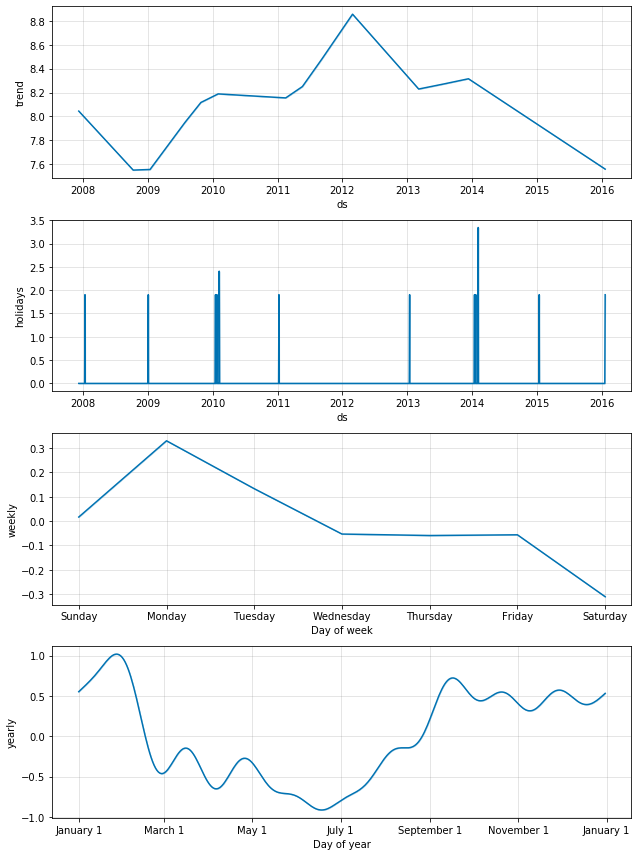

In [280]:
# Python
fig = m.plot_components(forecast)

In [68]:
results_playoff = forecast.set_index('ds')[['yhat']]
results_playoff = results_playoff.join(wiki_df.set_index('ds'))
results_playoff = results_playoff.dropna()
results_playoff.head(3)

,yhat,y
ds,,
2007-12-10,8.828967,9.590761
2007-12-11,8.611660,8.519590
2007-12-12,8.411726,8.183677


In [69]:
MAE_playoff = mean_absolute_error(results_playoff.y, results_playoff.yhat)
MSE_playoff = mean_squared_error(results_playoff.y, results_playoff.yhat)
print('Playoff Mean Absolute Error:', MAE_holiday, 'Original Mean Absolute Error:', MAE_1)
print('Playoff Mean Squared Error:', MSE_holiday, 'Original Mean Squared Error:', MSE_1)

Playoff Mean Absolute Error: 0.345792912911995 Original Mean Absolute Error: 0.35052423769332974
Playoff Mean Squared Error: 0.23727435832738542 Original Mean Squared Error: 0.24338829460793038


# Now Try on your Own!
We will download historical stock information and try to predict the next 5 days of the stock's performance

In [282]:
# df = pd.read_csv('')

In [283]:
# df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-03-02,129.250000,130.279999,125.760002,126.599998,116.504845,246938500
1,2015-03-09,127.959999,129.570007,121.629997,123.589996,113.734856,326514100
2,2015-03-16,123.879997,129.250000,122.870003,125.900002,115.860680,266672900
3,2015-03-23,127.120003,128.039993,122.599998,123.250000,113.421997,209326300
4,2015-03-30,124.050003,126.489998,123.099998,125.320000,115.326912,162031800


In [284]:
# stock = df[['Date','Close']]

In [285]:
# stock.head()

,Date,Close
0,2015-03-02,126.599998
1,2015-03-09,123.589996
2,2015-03-16,125.900002
3,2015-03-23,123.250000
4,2015-03-30,125.320000


## Split Train & Test Data Before Analysis

In [ ]:
# prediction_size = 360
# train_df = stock[:-prediction_size]
# train_df.tail(n=3)


In [ ]:
# test_df = stock[len(stock)-prediction_size:]

## Analysis and Modeling

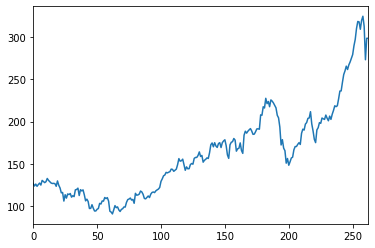

In [287]:
stock.Close.plot()

**Create your stock forecast with Prophet!**

In [308]:
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=360)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

**How do you do compared to the market?**

In [ ]:
results_stock = forecast.set_index('ds')[['yhat']]
results_stock = results_stock.join(stock.set_index('ds'))
results_stock = results_stock.dropna()
results_stock.head(3)

In [ ]:
MAE_Stock = mean_absolute_error(results_stock.y, results_stock.yhat)
print('Mean Absolute Error:', MAE_Stock)
MSE_Stock = mean_squared_error(results_stock.y, results_stock.yhat)
print('Mean Squared Error:', MSE_Stock)